# Quick tests outside of Test macro

In [135]:
using GalacticDynamics
using Test
using PythonCall
using DifferentialEquations
using CairoMakie


pyimport("sys")."path".append("")
pyimport("sys")."path".append("python")
accelerations_py = pyimport("accelerations")
au = pyimport("astropy.units")
gd = pyimport("gala.dynamics")
gp = pyimport("gala.potential")
gu = pyimport("gala.units")
gi = pyimport("gala.integrate")

Python: <module 'gala.integrate' from '/home/mmestre/.conda/envs/cosmos/lib/python3.11/site-packages/gala/integrate/__init__.py'>

In [160]:

t₁, t₂ = 0.0, 6.3
t_range = (t₁, t₂)
Δt = 0.01
n_max = (t₂-t₁)/Δt
x₀ = -50*[1,0,0]
v₀ = 200*[0,1,0]
m = 10^12*𝕦.m  # Msun
a = 20*𝕦.l
pot = NFW(m, a)
c = concentration(pot)
f(x) = log(1+x)-x/(1+x)
m_g = m/f(c)
usys = gu.UnitSystem(au.kpc, au.Gyr, au.Msun, au.radian, au.kpc/au.Gyr, au.kpc/au.Gyr^2)
pot_Gala = gp.NFWPotential(Py(adimensional(m_g))*au.Msun, Py(adimensional(a))*au.kpc, units=usys)
w₀ = gd.PhaseSpacePosition(pos=Py(x₀)*au.kpc, vel=Py(v₀)*au.kpc/au.Gyr)

Python: <PhaseSpacePosition cartesian, dim=3, shape=()>

In [161]:
acc =  acceleration(pot,x₀)[1]
acc_Gala = pyconvert(Vector{Float64},pot_Gala.acceleration(w₀)[0])[1];
acc_diff = abs(acc - acc_Gala)

2.2737367544323206e-13

𝕤.ode = Vern8(; stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true,)
sol_gala.t[-1] = <py Quantity 6.3 Gyr>
sol.t[end] = 6.3
sol_gala.x[0 + 100] = <py Quantity 59.75059963 kpc>
(sol.x[1, :])[1 + 100] = 59.750599633944326
findmax(sol_diff) = (6.965805710024142e-11, 563)


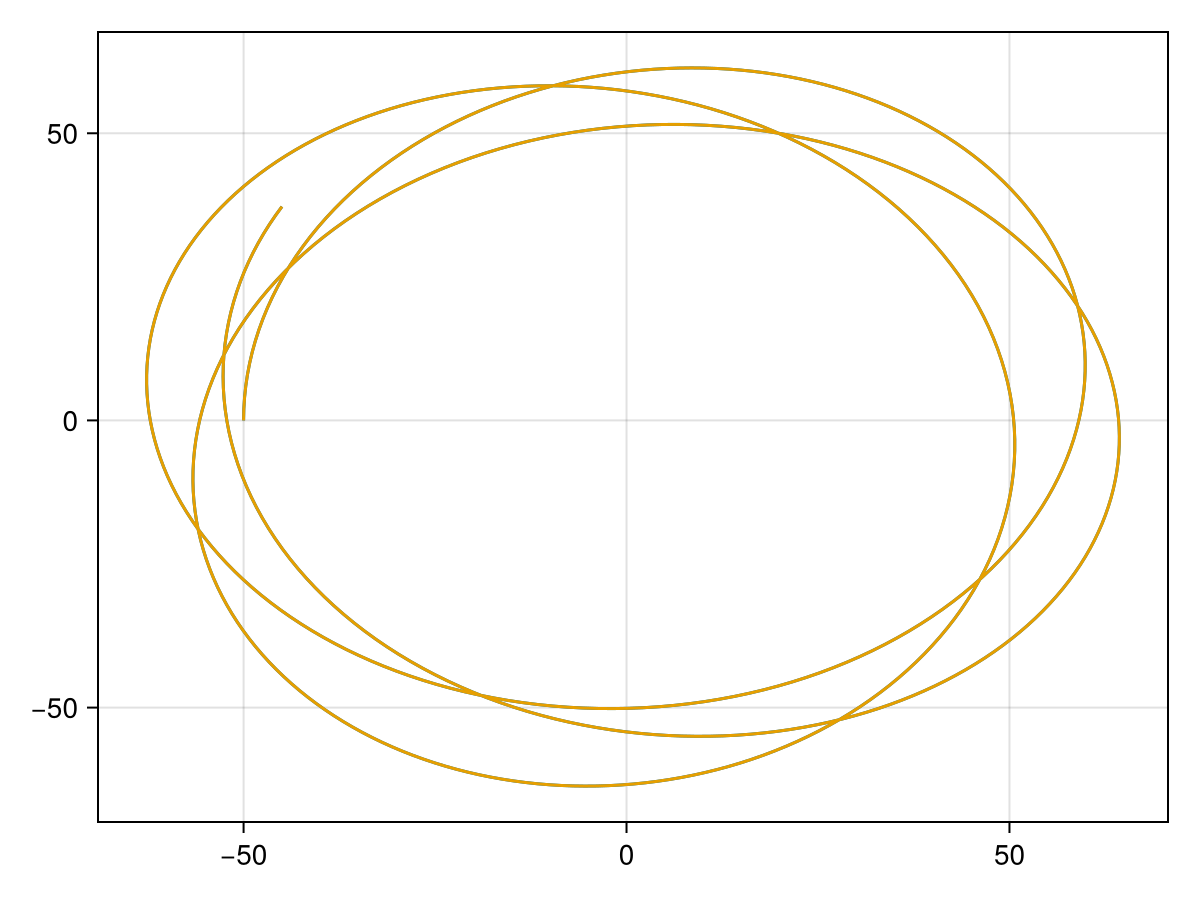

In [165]:
sol_gala = pot_Gala.integrate_orbit(w₀, dt=Δt*au.Gyr, t1=t₁, t2=(t₂)*au.Gyr,
                                    Integrator=gi.DOPRI853Integrator,
                                    Integrator_kwargs=Dict("rtol"=>5.0e-12, "atol"=>0.5e-12))
sol = evolve(pot, x₀, v₀, t_range, Vern9(); options=ntSolverOptions(; reltol=5.0e-12, abstol=0.5e-12,saveat=Δt))
@show 𝕤.ode
@show sol_gala.t[-1]
@show sol.t[end]
@show sol_gala.x[0+100]
@show sol.x[1,:][1+100]
orb_gala_x = pyconvert(Vector{Float64}, sol_gala.x)
orb_gala_y = pyconvert(Vector{Float64}, sol_gala.y)
orb_x = sol.x[1,:]
orb_y = sol.x[2,:]
sol_diff = abs.(orb_gala_x-orb_x)
@show findmax(sol_diff)
lines(orb_gala_x,orb_gala_y)
lines!(orb_x,orb_y)
current_figure()



In [51]:
sol = evolve(pot, x₀, v₀, t_range, Vern7(); options=ntSolverOptions(; saveat=Δt))
@show sol.x;

sol.x = [10.0 10.89569654712676 11.588000256102779 12.083075367940987 12.385141192395608 12.496698661487171 12.41865776477321 12.150382676478769 11.68966029373267 11.03258821127346 10.173367498333134; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]


In [35]:
sol = evolve(pot, x₀, v₀, t_range, DP8(); options=ntSolverOptions(; saveat=Δt))
@show sol.x;

sol.x = [10.0 10.895696539341532 11.588000260948066 12.083075365380834 12.385141185683452 12.496698660861693 12.418657761370094 12.15038266552423 11.68966025897951 11.032588274154195 10.173367497878917; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
